<a href="https://colab.research.google.com/github/ashab-k/flux_lora_finetune/blob/main/flux_lora_finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [2]:
import torch
from diffusers import AutoPipelineForText2Image
from IPython.display import display
from PIL import Image

In [3]:
import tarfile

def extract_tar(tar_path, extract_path):
  try:
    with tarfile.open(tar_path, 'r') as tar:
      tar.extractall(extract_path)
    print(f"Successfully extracted '{tar_path}' to '{extract_path}'")
  except FileNotFoundError:
    print(f"Error: File '{tar_path}' not found.")
  except tarfile.ReadError:
    print(f"Error: Could not read tar file '{tar_path}'. Check if it's a valid tar archive.")
  except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Example usage
extract_tar('/content/flux_lora.tar', '/content/extracted')


Successfully extracted '/content/flux_lora.tar' to '/content/extracted'


In [4]:
!ls /content/extracted/


circuitbent2b_embeddings.safetensors  img_0810_2.jpg	   training_args.json
circuitbent2b_lora.safetensors	      img_0810_3.jpg	   validation_grid.jpg
img_0810_0.jpg			      README.md
img_0810_1.jpg			      special_params.json


In [5]:
pipe = AutoPipelineForText2Image.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/3.87G [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [6]:
lora_path = "/content/extracted/circuitbent2b_lora.safetensors"
try:
    pipe.load_lora_weights(lora_path, weight_name="circuitbent2b_lora.safetensors")  # or omit weight_name if not needed
    print(f"LoRA weights loaded from {lora_path}")
except Exception as e:
    print(f"Could not load LoRA weights: {e}")

LoRA weights loaded from /content/extracted/circuitbent2b_lora.safetensors


  0%|          | 0/30 [00:00<?, ?it/s]

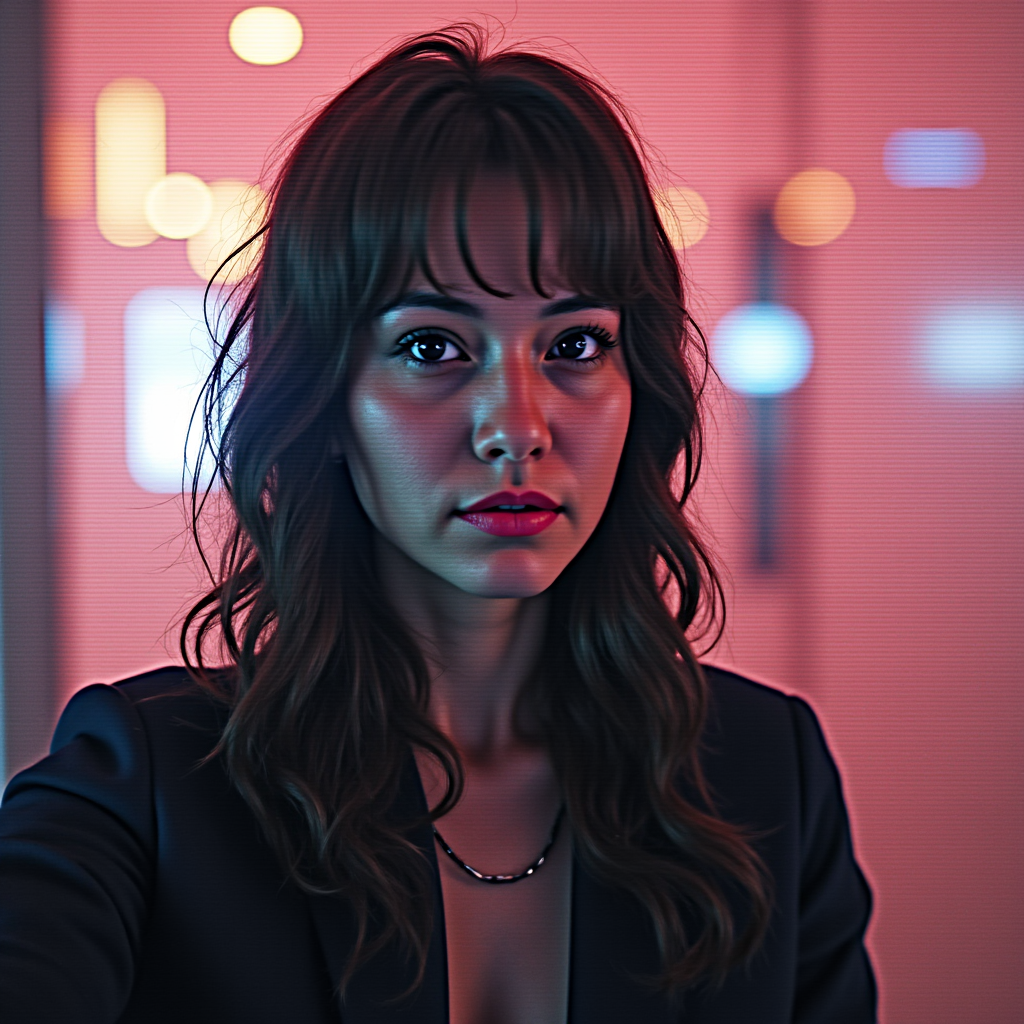

In [14]:
def generate_image(prompt, negative_prompt="", steps=30, guidance=7.5):
    image = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=steps,
        guidance_scale=guidance
    ).images[0]
    image.save("generated_image.png")
    return image

# Correct prompt with trigger
prompt = (
    "corrupted selfie sent back from the year 3023 glitched out - high blur - distorted - circuitbent  "
)
generate_image(prompt)
